In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import os

In [2]:
# 이 코드를 실행하기 전에 
# 1) 아래 폴더에 분석하려는 모든 submission화일을 저장해야 함 !!!
# 2) 화일명은 XXX_auc.csv 형태(예: DNN_0.797953)로 저장되어 있어야 함.
path = '../submission_test/' # csv 파일들이 저장돼있는 경로를 설정

preds = []
score = []
names = []
files = [file for file in os.listdir(path) if file.endswith(".csv")]

for f in files:
    try:    
        preds.append(pd.read_csv(path + '/' + f).pred) # csv를 불러와서 pred값만 저장 / cor 계산을 위함
        score.append(float(f[f.index('.')-1:-6])) # score에 스코어들을 저장
        names.append(f[:f.find('.csv')]) # 데이터의 이름을 뽑아줌
    except:
        print(f'Read error: {f}')
        continue
        
corr = pd.DataFrame(preds).T.corr().mean(axis=0).values

df = pd.DataFrame({'model': names, 'aucs': score, 'cor': corr})  # 데이터프레임에 저장

In [6]:
from matplotlib import font_manager,rc
import matplotlib.font_manager as fm
# 모든 columns에 대한 전처리와 EDA를 시행하기 위해서 설정
pd.set_option('max_columns', None)
# pd.set_option('max_rows', None)
# 그래프 한글 깨짐 방지
path = 'C:/Windows/Fonts/hmfmpyun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

findfont: Font family ['Pyunji R'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Pyunji R'] not found. Falling back to DejaVu Sans.


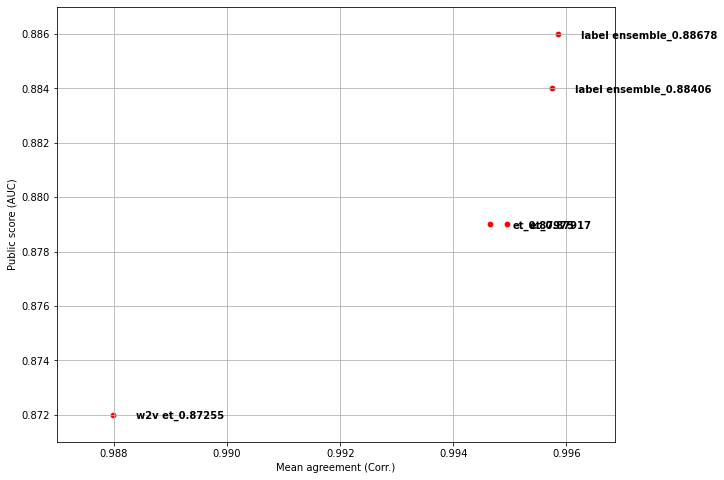

In [7]:
plt.figure(figsize=(10,8))
g = sns.scatterplot(x="cor", y="aucs", data=df, s=40, color='red')

for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.0004, df.aucs[line]-0.00015, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.001,df.cor.max()+0.001))
plt.ylim((df.aucs.min()-0.001,df.aucs.max()+0.001))
plt.xlabel('Mean agreement (Corr.)')
plt.ylabel('Public score (AUC)')

plt.grid()
plt.show()

### END